<a href="https://www.kaggle.com/code/fellahabdelnour13/solving-tsp-with-genetic-algorithms?scriptVersionId=197940195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div id="necessary_packages" >
    <h1 style="font-family:verdana;"> Overview </h1>
</div>

<ol style="font-family:verdana;font-size:1.1875rem;" >
    <li><a href="#what_are_genetic_algorithms">What are genetic algorithms ?</a></li>
    <li><a href="#traveling_salesman_problem">What is Traveling salesman problem ?</a></li>
    <li><a href="#necessary_packages">Necessary Packages</a></li>
    <li><a href="#reproducibility">Reproducibility</a></li>
    <li><a href="#map_generation_and_visualization">Map generation and visualization</a></li>
    <li><a href="#defining_the_genetic_algorithm">Defining the genetic algorithm</a></li>
    <li><a href="#model_training">Model Training</a></li>
    <li><a href="#solution_visualization">Solution Visualization</a></li>
    <li><a href="#thank_you">Thank you :)</a></li>
</ol>

<div id="what_are_genetic_algorithms" >
   <h1 style="font-family:verdana;"> What are genetic algorithms ? </h1>
</div>

<h2 style="font-family:verdana;" >Overview</h2>

<p>
   Genetic Algorithms (GAs) are a class of optimization algorithms that mimic the process of natural evolution. Inspired by Charles Darwin's theory of natural selection, GAs are used to solve complex problems by evolving solutions over successive generations. These algorithms are particularly effective for problems where the search space is large and traditional methods are inefficient or impractical.
</p>

<h2 style="font-family:verdana;" >Use Cases</h2>

GAs are widely used in various fields, including:
- **Optimization**: Finding the best solution in scenarios with many possible combinations, like the Traveling Salesman Problem (TSP).
- **Machine Learning**: Feature selection and hyperparameter tuning in models.
- **Engineering Design**: Optimizing designs for efficiency, cost, or performance.
- **Artificial Life**: Simulating natural evolution and behaviors in virtual environments.

<h2 style="font-family:verdana;" >Core Operations</h2>

1. **Generation**
   - **Definition**: In GAs, a generation is a set of potential solutions (individuals) to the problem. Each individual is represented by a chromosome, typically encoded as a string of binary digits (bits) or other data structures.

   - **Example**: For the TSP, each chromosome could represent a possible route a salesman could take to visit all cities. If there are 5 cities, a chromosome might look like `[1, 3, 2, 5, 4]`, representing a specific order in which the cities are visited.

2. **Selection**
   - **Definition**: Selection is the process of choosing individuals from the current generation to create offspring for the next generation. The goal is to select individuals with better fitness, meaning those that represent more optimal solutions, so that their characteristics are passed on.

   - **Example**: In a TSP scenario, selection might involve choosing the top 20% of routes (individuals) that have the shortest distances. These routes are then used to generate new routes, with the expectation that the new routes will also be short.

3. **Crossover**
   - **Definition**: Crossover (or recombination) is a genetic operator used to combine the genetic information of two parent individuals to produce new offspring. This simulates the exchange of genes during reproduction in nature.

   - **Example**: For TSP, if two parent routes are `[1, 3, 2, 5, 4]` and `[4, 1, 5, 2, 3]`, a crossover might produce an offspring route like `[1, 3, 5, 2, 4]`, taking parts from both parents.

4. **Mutation**
   - **Definition**: Mutation is a genetic operator that introduces random changes to an individual's chromosome. It helps maintain genetic diversity in the population and prevents the algorithm from getting stuck in local optima.
   
   - **Example**: In TSP, a mutation might involve swapping two cities in a route. If a route is `[1, 3, 2, 5, 4]`, a mutation could change it to `[1, 5, 2, 3, 4]`, altering the order in which the cities are visited.

<div style="width:100%;text-align: center;"> 
    <img align=middle src="https://github.com/abdelnour13/my_kaggle_notebooks/blob/main/files/Flow-chart-of-genetic-algorithm.png?raw=true"> 
</div>

<div id="traveling_salesman_problem" >
    <h1 style="font-family:verdana;"> What is Traveling salesman problem ? </h1>
</div>

The Traveling Salesman Problem (TSP) is a classic optimization problem where the goal is to find the shortest possible route that visits a list of cities exactly once and returns to the starting point. It is widely known for being computationally challenging, especially as the number of cities increases.

<div style="width:100%;text-align: center;"> 
    <img align=middle src="https://github.com/abdelnour13/my_kaggle_notebooks/blob/main/files/tsp.jpeg?raw=true"> 
</div>

<div id="necessary_packages" >
    <h1 style="font-family:verdana;"> Necessary Packages </h1>
</div>

- **numpy**: NumPy is a powerful library for numerical computing in Python. It provides support for arrays, matrices, and a wide range of mathematical functions to operate on these data structures efficiently.

- **seaborn**: Seaborn is a data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics, such as heatmaps, bar plots, and scatter plots.

- **networkx**: NetworkX is a library for creating, manipulating, and studying the structure and dynamics of complex networks (graphs). It's useful for tasks involving graph theory, such as representing and analyzing networks like social networks or the Traveling Salesman Problem.

- **matplotlib.pyplot**: Matplotlib's `pyplot` module is a plotting library that provides a MATLAB-like interface. It is used for creating static, interactive, and animated visualizations in Python, such as line plots, histograms, and scatter plots.


In [1]:
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import warnings
from tqdm.notebook import trange
from typing import Optional

In [2]:
warnings.simplefilter("ignore",category=FutureWarning)
warnings.simplefilter("ignore",category=UserWarning)

In [3]:
sns.set_style("darkgrid")
sns.set_palette("husl")

<div id="reproducibility" >
    <h1 style="font-family:verdana;"> Reproducibility </h1>
</div>

In [4]:
np.random.seed(44)

<div id="map_generation_and_visualization" >
    <h1 style="font-family:verdana;"> Map generation and visulization </h1>
</div>

This class is will be used to generate and visualize a a collection of tows represented in a 2D-Map.

In [5]:
class Map:

    def __init__(self,
        map_ : np.ndarray,
    ) -> None:
        self.map = map_
        self.indices = np.int32(np.arange(map_.shape[0]))

    def get_random_map(
        towns_count : int,
        x_min : int = 200,
        y_min : int = 200,
        x_max : int = 500,
        y_max : int = 500
    ):
        x = np.random.randint(low=x_min,high=x_max,size=(towns_count))
        y = np.random.randint(low=y_min,high=y_max,size=(towns_count))

        map_ = np.vstack([x, y]).transpose()

        return Map(map_)
    
    def get_towns_count(self) -> int:
        return self.map.shape[0]
    
    def as_numpy_array(self) -> np.ndarray:
        return self.map
    
    def visualize(self, path: Optional[np.ndarray] = None):

        fig, ax = plt.subplots()
        fig.set_size_inches(15, 15)

        G = nx.DiGraph() 

        for node in self.indices:
            x = self.map[node][0]
            y = self.map[node][1]
            G.add_node(node, pos=(x, y))

        if path is not None:
            
            for i in range(len(path) - 1):
                town1, town2 = int(path[i]), int(path[i + 1])
                G.add_edge(town1, town2, color='black', weight=2)
                
            start_node = int(path[0])
            end_node = int(path[-1])

                        
            pos = nx.get_node_attributes(G, 'pos')

            nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='green', node_size=2000, ax=ax)
            nx.draw_networkx_nodes(G, pos, nodelist=[end_node], node_color='red', node_size=2000, ax=ax)

        pos = nx.get_node_attributes(G, 'pos')
        edges = G.edges(data=True)

        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=15, ax=ax, arrows=True)
        nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=20, ax=ax)



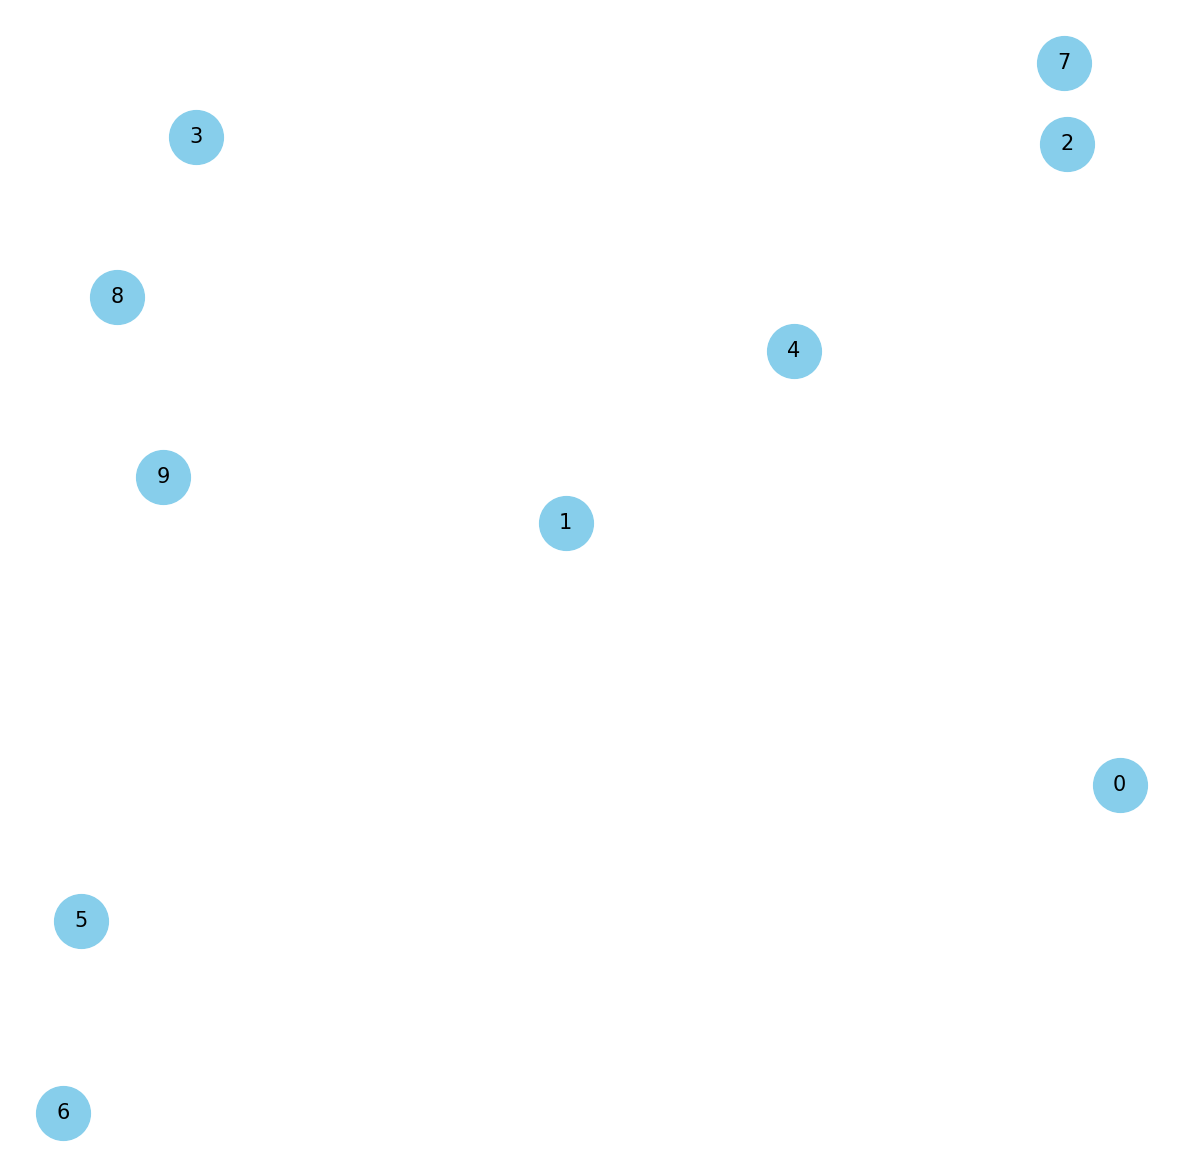

In [6]:
map_ = Map.get_random_map(towns_count=10,x_max=1000,y_max=1000)
map_.visualize()

<div id="defining_the_genetic_algorithm">
    <h1 style="font-family:verdana;"> Defining our Genetic Algorithm </h1>
</div>

The `TravelingSalesmanProblemSolver` class represents our genetic algorithm with a method representing each of the core operations discussed earlier.

- **spawn**: This method generates a random `population` of `solutions`. Here, a solution is a path, so it is represented as a list of integers, with each integer representing a town on the map.

- **evaluate**: The `evaluate` method assesses our population by calculating a score for each solution. In this case, the score is the distance that the traveling salesman must travel.

- **select**: This method takes as input the population and an array of weights. The sample with the highest weight has a higher chance of being selected. The weights are calculated using the scores. This method is called `roulette wheel selection`. The reason we don't simply pick the top individuals is to maintain population diversity; otherwise, our algorithm may converge too quickly and far from the optimal solution.

- **crossover**: This method takes as input two individuals and generates two new ones by:
  - Choosing two random split points, one for each individual.
  - Concatenating the first half of each input individual with the other individual while removing towns that already occurred in that half to maintain the definition of a path (A trail is a walk in which all edges are distinct).

- **mutate**: This method represents the `mutation` operator. It randomly shifts the path by 1.

- **step**: This method combines all the above operations into one method in the following order:
  1. Given a generation `G`, randomly pick two individuals using the `select` operator.
  2. Apply the `crossover` operation to generate two new individuals.
  3. Apply the `mutate` operator to the newly generated individuals.
  4. If the size of the new generation is less than `n`, go back to step 1.
  5. Evaluate the new generation.
  6. Combine the previous and the new generation.
  7. Create a new generation using the top `n` individuals from the combined generations. We do this so we don't lose good solutions generated from the previous step.

- **train**: This method makes use of the `step` method. It generates a random population, evaluates it, then calls the `step` method for a certain number of iterations, and stores the history of the mean scores as well as the best score of the generation at each step for plotting purposes.


In [7]:
class TravelingSalesmanProblemSolver:

    def __init__(self,
        map_ : Map,
        generation_size : int = 100,
        mutate_p : float = 0.05,
        n_iter : int = 30
    ) -> None:
        self.map = map_
        self.generation_size = generation_size
        self.mutate_p = mutate_p
        self.n_iter = n_iter

    def spwan(self) -> np.ndarray:

        m = self.map.get_towns_count()
        n = self.generation_size

        population = []
        possible_values = np.int32(np.arange(m))

        for _ in range(n):
            individual = np.random.permutation(possible_values)
            population.append(individual)

        return np.vstack(population)
    
    def evaluate(self, population : np.ndarray) -> np.ndarray:

        map_ = self.map.as_numpy_array()
        scores = []

        for individual in population:

            distance = np.sum(np.sqrt(np.sum(np.power(map_[individual[:-1]] - map_[individual[1:]], 2), axis=1)))
            scores.append(distance)

        return np.array(scores)
    
    def select(self, population : np.ndarray, p : np.ndarray) -> tuple[np.ndarray,np.ndarray]:
        indices = np.arange(population.shape[0])
        p1, p2 = np.random.choice(indices, size=2, p=p)
        return population[p1], population[p2]
    
    def crossover(self, p1 : np.ndarray, p2 : np.ndarray) -> tuple[np.ndarray,np.ndarray]:

        indices = np.arange(start=1,stop=p1.shape[0] - 1)

        split_idx1 = np.random.choice(indices, size=1)
        split_idx2 = np.random.choice(indices, size=1)

        head1, _ = np.split(p1, indices_or_sections=split_idx1)
        head2, _ = np.split(p2, indices_or_sections=split_idx2)

        child1 = np.concatenate([head1, p2[~np.isin(p2, head1)]])
        child2 = np.concatenate([head2, p1[~np.isin(p1, head2)]])

        return child1,child2
    
    def mutate(self, individual : np.ndarray) -> np.ndarray:
        
        if np.random.rand() <= self.mutate_p:
            individual = np.roll(individual, shift=1)

        return individual
    
    def step(
        self,
        generation : np.ndarray, 
        scores : np.ndarray
    ) -> tuple[np.ndarray, np.ndarray]:

        n = self.generation_size
        new_generation = []

        p = 1 / scores
        p = p / np.sum(p)

        for _ in range(int(n / 2)):

            p1, p2 = self.select(generation, p)
            c1, c2 = self.crossover(p1, p2)

            c1 = self.mutate(c1)
            c2 = self.mutate(c2)
            new_generation.extend([c1,c2])

        new_generation = np.vstack(new_generation)
        new_scores = self.evaluate(new_generation)

        all_scores = np.concatenate([scores, new_scores])
        population = np.concatenate([generation, new_generation])

        top = np.argsort(all_scores)[:n]

        return population[top], all_scores[top]
    
    def train(self) -> tuple[np.ndarray,np.ndarray,np.ndarray]:

        generation = self.spwan()
        scores = self.evaluate(generation)

        means = []
        bests = []

        for _ in trange(self.n_iter):

            means.append(scores.mean())
            bests.append(scores.min())

            generation, scores = self.step(generation, scores)

        means = np.array(means)
        bests = np.array(bests)

        solution = generation[scores.argmin()]

        return means,bests,solution

<div id="model_training" >
    <h1 style="font-family:verdana;"> Model Training </h1>
</div>

In [8]:
model = TravelingSalesmanProblemSolver(map_=map_,generation_size=100,mutate_p=0.05,n_iter=500)

In [9]:
means, bests, solution = model.train()

  0%|          | 0/500 [00:00<?, ?it/s]

<Axes: >

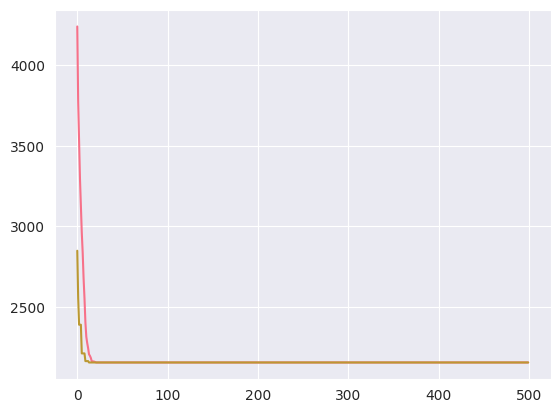

In [10]:
ax = sns.lineplot(x=range(model.n_iter), y=means)
sns.lineplot(x=range(model.n_iter), y=bests, ax=ax)

<div id="solution_visualization" >
    <h1 style="font-family:verdana;"> Solution Visualization </h1>
</div>

In [11]:
bests[-1],solution

(2153.0976238439907, array([0, 4, 7, 2, 1, 9, 3, 8, 5, 6], dtype=int32))

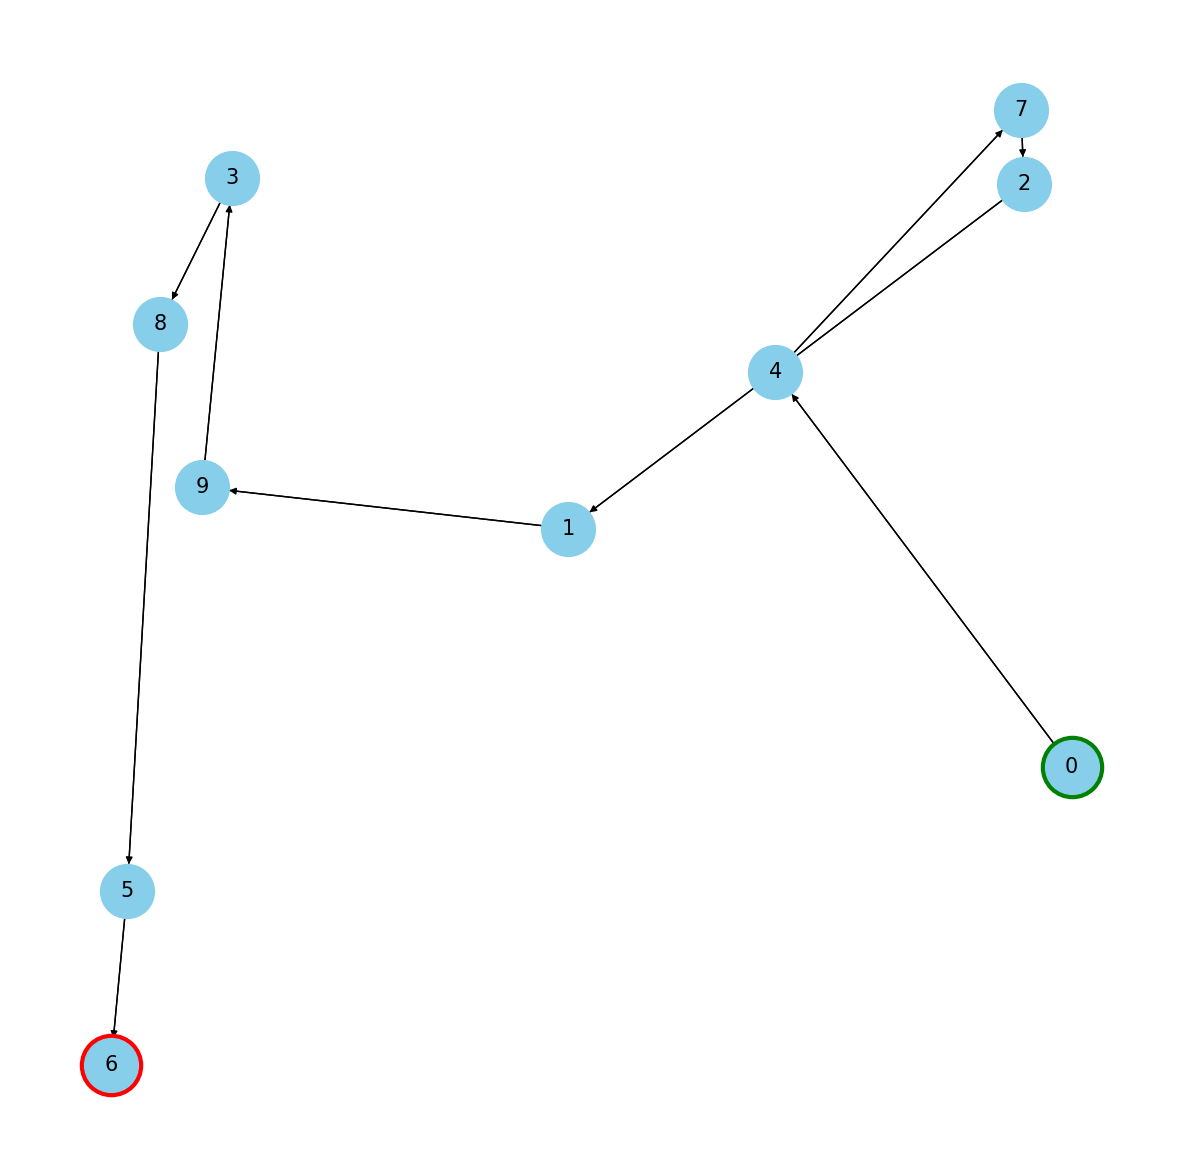

In [12]:
Map.visualize(map_,solution)

<div id="thank_you" >
    <h1 style="font-family:verdana;"> Thank you :) </h1>
</div>